# Sprint1 Group2
## General Status of PH_SOA vs ASEAN

In [1]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.io as pio

In [2]:
# Load the data
data = pd.read_csv('../data/micro_world.csv', encoding='ISO-8859-1')
data['SOA'] = [ 1 if x == 1 else 0 for x in data['fin16']]


# Define the age bin edges and labels
age_bins = [0, 18, 25, 35, 50, 65, 120]
age_labels = ['below 18', '18-24', '25-34', '35-49', '50-64', '65 and over']

# Convert the age column into age groups using pd.cut()
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

ph_data = data.query('economy == "Philippines"')

In [3]:
#Determine countries in the dataset that are in Asean region
data['regionwb'].unique()
df_EAP = data[data['regionwb'] == 'East Asia & Pacific (excluding high income)']
df_EAP['economy'].unique()

#add Singapore as it is also an ASEAN country but grouped in High Income region

array(['Cambodia', 'China', 'Indonesia', 'Lao PDR', 'Malaysia',
       'Mongolia', 'Myanmar', 'Philippines', 'Thailand'], dtype=object)

In [4]:
#Compare PH %SOA vs Asean Counterparts
Asean = ['Singapore', 'Thailand', 'Indonesia', 'Vietnam', 'Philippines', 'Malaysia', 'Cambodia', 'Brunei', 'Lao PDR', 'Myanmar']
data_asean = data.query('economy in @Asean')
data['SOA'] = [ 1 if x == 1 else 0 for x in data['fin16']]

data_asean


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,SOA,age_group
15026,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,122064432,1.923940,1,63.0,1,3,...,4,4.0,2,2.0,1,2,0,0.0,0,50-64
15027,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,138600426,0.667376,1,67.0,1,3,...,4,4.0,2,5.0,2,2,0,0.0,0,65 and over
15028,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,129028091,1.041924,1,41.0,1,2,...,4,4.0,2,5.0,2,2,0,0.0,0,35-49
15029,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,139188390,0.542453,2,45.0,1,5,...,4,2.0,5,1.0,1,2,0,0.0,0,35-49
15030,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,135945774,0.453226,1,30.0,1,5,...,4,4.0,2,2.0,1,1,1,0.0,0,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114841,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,119262521,1.472721,1,70.0,3,3,...,4,4.0,2,5.0,1,2,1,0.0,0,65 and over
114842,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,201432535,0.157863,2,53.0,3,5,...,4,4.0,1,1.0,1,1,1,1.0,1,50-64
114843,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,121029659,0.989320,2,40.0,3,5,...,4,4.0,1,1.0,1,1,1,1.0,1,35-49
114844,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,153317788,0.138057,1,38.0,3,5,...,4,4.0,1,1.0,1,1,1,1.0,1,35-49


In [5]:
# Create a function to generate needed data frames for each demographic variable
def dem_df(df, dem):
    # Create an empty data frame
    ph_dem = pd.DataFrame()

    # Group the data and apply aggregations
    ph_dem = df.groupby(dem).agg(
        POP=('wpid_random', 'count'),
        SOA=('SOA', 'sum')
    ).reset_index()

    ph_dem['~SOA'] = ph_dem['POP'] - ph_dem['SOA'] # Compute number of people who did not save for old age
    ph_dem['%SOA'] = ph_dem['SOA'] / ph_dem['POP'] * 100 # Compute % of people who saved for old age
    ph_dem['%~SOA'] = ph_dem['~SOA'] / ph_dem['POP'] * 100 # Compute % of people who did not save for old age
  
    return ph_dem

In [6]:
dem = ['economy', 'economycode', 'regionwb'] 
grp_asean = dem_df(data_asean, dem)
grp_asean = grp_asean.sort_values('%SOA', ascending=False).round(2)
grp_asean

,economy,economycode,regionwb,POP,SOA,~SOA,%SOA,%~SOA
6,Singapore,SGP,High income,1000,666,334,66.60,33.40
7,Thailand,THA,East Asia & Pacific (excluding high income),1017,564,453,55.46,44.54
3,Malaysia,MYS,East Asia & Pacific (excluding high income),1000,535,465,53.50,46.50
5,Philippines,PHL,East Asia & Pacific (excluding high income),1000,416,584,41.60,58.40
4,Myanmar,MMR,East Asia & Pacific (excluding high income),1000,327,673,32.70,67.30
1,Indonesia,IDN,East Asia & Pacific (excluding high income),1062,294,768,27.68,72.32
2,Lao PDR,LAO,East Asia & Pacific (excluding high income),1000,256,744,25.60,74.40
0,Cambodia,KHM,East Asia & Pacific (excluding high income),1000,82,918,8.20,91.80


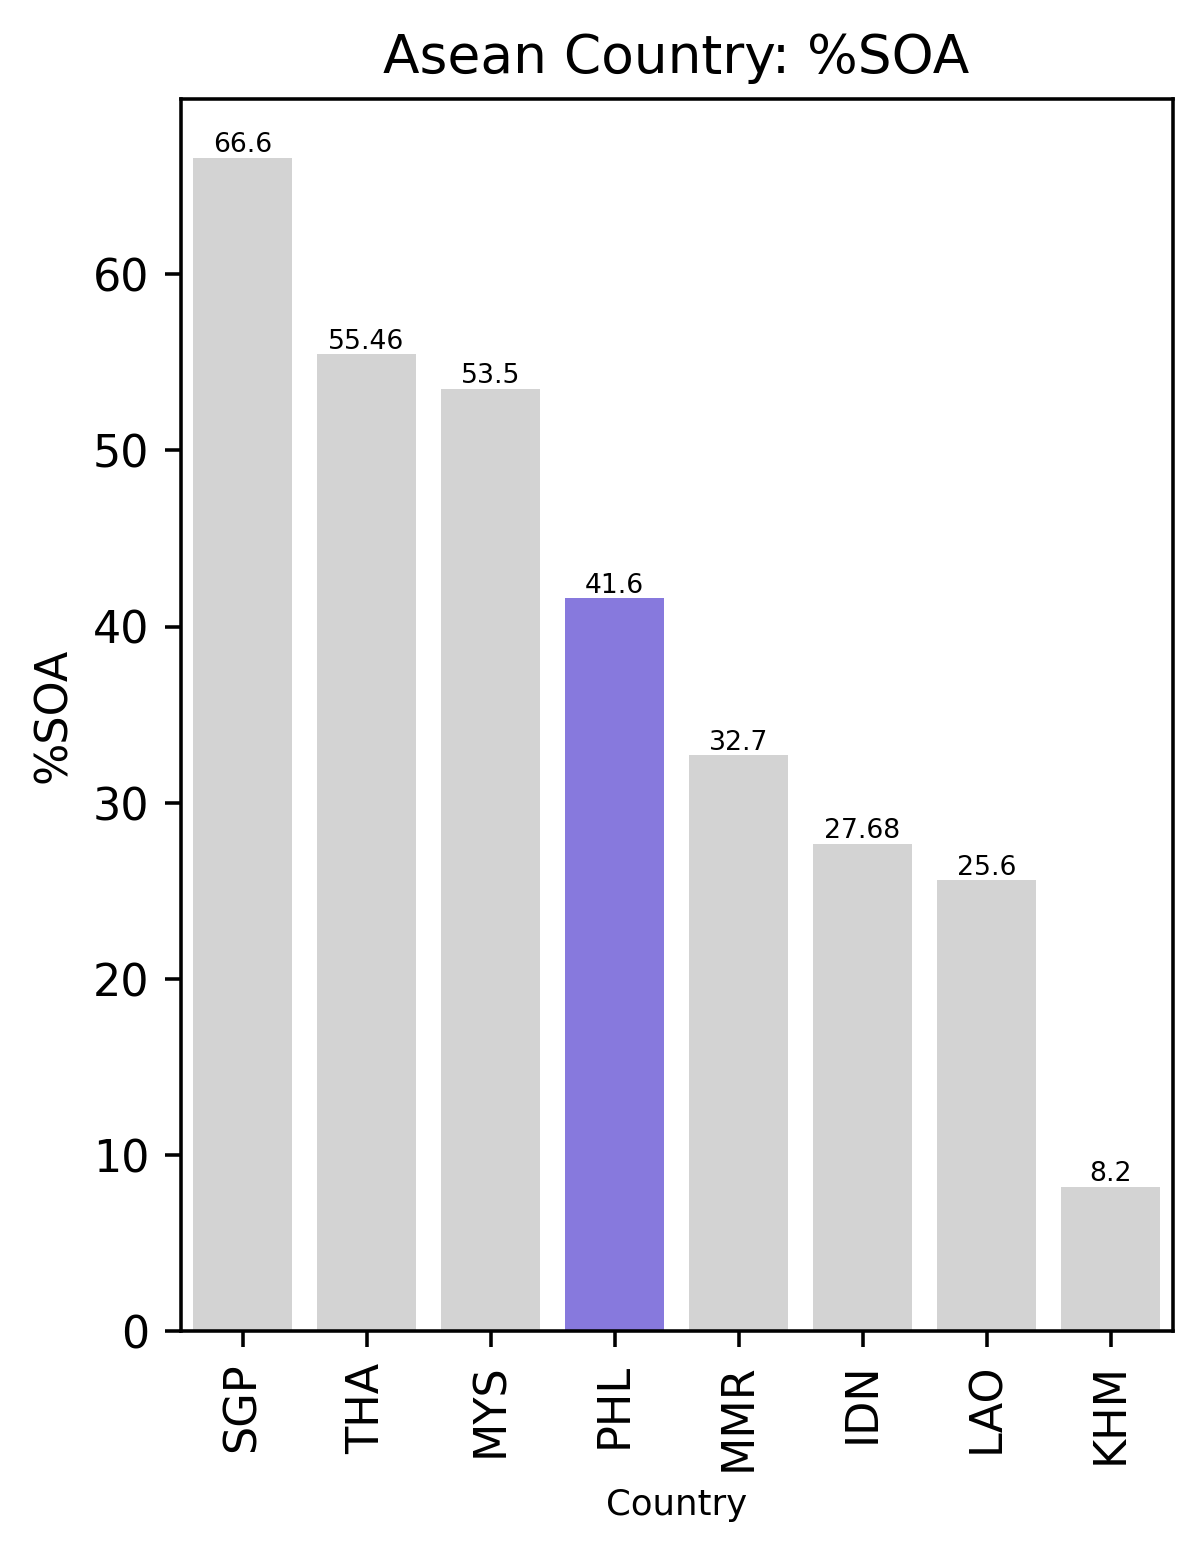

In [7]:
# create a bar plot for Asean Countries
plt.figure(figsize=(4, 5), dpi=320)
#sns.set_style('whitegrid')
clr = ['mediumslateblue' if x == "PHL" else 'lightgrey' for x in grp_asean['economycode']]  
ax = sns.barplot(x="economycode", y="%SOA", data=grp_asean, palette=clr)
ax.bar_label(ax.containers[0], fontsize=6)

plt.xlabel('Country', fontsize=8)
plt.xticks(rotation=90)
plt.title('Asean Country: %SOA')

#Save
plt.savefig('Asean SOA.png', dpi=320, transparent=True, bbox_inches='tight')


# Clustering
## Cluster PH_data to determine the features of SOA/~SOA 

In [8]:
#Clean and Prepare data for Clustering
# Filter data for Clustering
ph_data = ph_data.query('fin44a == 1 or fin44a == 2')
cluster=['age_group', 'emp_in', 'inc_q', 'account_fin', 'account_mob', 'saved', 'fin16']
cluster_data = ph_data[cluster]
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
90750,25-34,1.0,5,1,1.0,1,1
90751,18-24,1.0,4,1,0.0,1,1
90753,18-24,1.0,5,1,1.0,1,1
90754,25-34,1.0,3,0,0.0,1,2
90755,50-64,1.0,1,1,0.0,0,2
...,...,...,...,...,...,...,...
91745,25-34,1.0,5,1,1.0,0,2
91746,18-24,1.0,3,1,1.0,1,1
91747,below 18,2.0,1,0,0.0,0,2
91748,35-49,1.0,4,1,0.0,0,2


In [9]:
cluster_data = cluster_data.replace({
    'account_fin':{
    1:'Yes',
    0:'No'
    },
    
     'account_mob':{
    1:'Yes',
    0:'No'
    },
    
    'inc_q':{
    1:'Poorest 20%',
    2:'Next poorest 20%',
    3:'Middle 20%',
    4:'Next richest 20%',
    5:'Richest 20%',
    },
    
    'emp_in':{
    1:'Yes',
    2:'No'
    },
    
    'saved':{
    1:'Yes',
    0:'No'
    },

    
    'fin16':{
    1: 'Yes',
    2: 'No',
    3: 'No',
    4: 'No'
    }
    }
)

In [10]:
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes
90754,25-34,Yes,Middle 20%,No,No,Yes,No
90755,50-64,Yes,Poorest 20%,Yes,No,No,No
...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes
91747,below 18,No,Poorest 20%,No,No,No,No
91748,35-49,Yes,Next richest 20%,Yes,No,No,No


In [11]:
# Check nulls
cluster_data.isna().sum()

age_group      1
emp_in         0
inc_q          0
account_fin    0
account_mob    0
saved          0
fin16          0
dtype: int64

In [12]:
#Drop null
cluster_data = cluster_data.dropna(subset=['age_group'])
cluster_data.isna().sum()

age_group      0
emp_in         0
inc_q          0
account_fin    0
account_mob    0
saved          0
fin16          0
dtype: int64

In [13]:
# One-hot encode categorical columns
#cluster_data_encoded = pd.get_dummies(cluster_data)
#cluster_data_encoded

In [14]:
# Calculate silhouette scores for different number of clusters
#silhouette_scores = []
#for n_clusters in range(2, 7):
#    kmodes = KModes(n_clusters=n_clusters, init='random', n_init=5, random_state=42)
#    labels = kmodes.fit_predict(cluster_data_encoded)
#    silhouette_scores.append(silhouette_score(cluster_data_encoded, labels))

# Create DataFrame
#results_df = pd.DataFrame({'Number of clusters': range(2, 7), 'Silhouette score': silhouette_scores})
#results_df

In [15]:

# Plot Silhouette scores
#plt.plot(results_df['Number of clusters'], results_df['Silhouette score'], marker='o')
#plt.xlabel('Number of clusters')
#plt.ylabel('Silhouette score')
#plt.title('Silhouette scores for different numbers of clusters')
#plt.show()


In [16]:
# Create clustering function
def run_kmodes(n_clusters=None, cluster_data=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42,
      )
  
  # Apply clustering to the data
  kmodes.fit(cluster_data)

  return kmodes.labels_

In [17]:
# Run our K-Modes function for n_clusters
labels = run_kmodes(
  n_clusters=5,
  cluster_data=cluster_data
)

In [18]:
labels

array([1, 4, 1, 3, 2, 0, 2, 3, 0, 3, 1, 2, 1, 3, 1, 3, 4, 0, 2, 4, 0, 3,
       1, 4, 2, 1, 3, 3, 0, 1, 3, 2, 0, 1, 1, 0, 3, 2, 4, 2, 1, 3, 4, 0,
       1, 1, 2, 0, 1, 4, 4, 3, 1, 0, 0, 0, 3, 0, 1, 0, 2, 3, 2, 0, 0, 1,
       2, 1, 4, 1, 3, 0, 0, 0, 0, 3, 1, 0, 0, 4, 2, 2, 0, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 3, 2, 2, 4, 0, 1, 4, 0, 2, 4, 3, 2, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 3, 3, 2, 4, 2, 0, 0, 1, 0, 0, 3, 4, 3, 3, 0, 0, 1, 3, 2,
       1, 2, 1, 3, 4, 4, 3, 3, 2, 4, 1, 2, 4, 1, 1, 1, 1, 1, 2, 3, 0, 1,
       4, 0, 1, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 3, 0, 4, 4, 1, 4,
       0, 3, 0, 0, 1, 0, 1, 0, 4, 4, 1, 0, 4, 4, 2, 1, 0, 0, 2, 4, 0, 4,
       1, 4, 4, 0, 2, 0, 2, 2, 0, 2, 1, 0, 4, 1, 0, 1, 3, 3, 3, 4, 4, 0,
       1, 0, 0, 0, 1, 4, 0, 1, 0, 2, 4, 2, 4, 0, 0, 1, 2, 3, 3, 0, 3, 1,
       2, 2, 0, 1, 0, 2, 0, 4, 2, 0, 0, 1, 2, 0, 1, 1, 4, 4, 3, 2, 0, 1,
       2, 0, 3, 2, 2, 1, 1, 4, 3, 2, 2, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1,
       3, 1, 0, 0, 1, 0, 2, 0, 3, 4, 1, 1, 3, 2, 3,

In [19]:
# Append the labels to cluster data
cluster_data['labels'] = labels


/var/folders/dp/f1rjx5qn4sq784ngz540hkk00000gn/T/ipykernel_12416/4094440874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['labels'] = labels


In [20]:
# Show data
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16,labels
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes,4
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
90754,25-34,Yes,Middle 20%,No,No,Yes,No,3
90755,50-64,Yes,Poorest 20%,Yes,No,No,No,2
...,...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No,1
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes,1
91747,below 18,No,Poorest 20%,No,No,No,No,0
91748,35-49,Yes,Next richest 20%,Yes,No,No,No,2


In [21]:
# Inspect the characteristics 
cluster_data.groupby('labels').agg(pd.Series.mode).sort_values(by='fin16')

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
labels,,,,,,,
0,18-24,No,Middle 20%,No,No,No,No
2,35-49,Yes,Next poorest 20%,No,No,No,No
3,25-34,Yes,Middle 20%,Yes,No,Yes,No
1,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes
4,35-49,Yes,Next richest 20%,Yes,No,Yes,Yes


In [106]:
ph_data = ph_data.dropna(subset=['age_group'])
ph_data['cluster'] = labels

ph_data[['cluster']]

,cluster
90750,1
90751,4
90753,1
90754,3
90755,2
...,...
91745,1
91746,1
91747,0
91748,2


In [145]:
#Educ
c0 = ph_data.query('cluster == 0')
c0_g = c0.groupby(['educ']).agg(
    pop = ('wpid_random', 'count'),
)

c0_g['E%'] = 100*c0_g['pop']/c0_g['pop'].sum()
c0_g
  

,pop,E%
educ,,
1,48,19.917012
2,171,70.954357
3,22,9.128631


In [146]:
#Employment
c0_e = c0.groupby(['emp_in']).agg(
    pop = ('wpid_random', 'count'),
)

c0_e['e%'] = 100*c0_e['pop']/c0_e['pop'].sum()
c0_e

,pop,e%
emp_in,,
1.0,71,29.460581
2.0,170,70.539419


In [147]:
#Account
c0_a = c0.groupby(['account']).agg(
    pop = ('wpid_random', 'count'),
)

c0_a['e%'] = 100*c0_a['pop']/c0_a['pop'].sum()
c0_a

,pop,e%
account,,
0,172,71.369295
1,69,28.630705
